In [1]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np 

## 1. Exploratory Data Analysis

In [2]:
# Load the data.csv file
df = pd.read_csv('data/data.csv')
df

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,1,1,39,2,130568,1,2
1,0,0,29,1,80315,0,0
2,1,0,35,0,107067,0,0
3,0,1,56,2,214000,1,0
4,1,1,45,2,158138,1,2
...,...,...,...,...,...,...,...
1995,0,0,33,1,99931,0,0
1996,1,1,42,2,143369,1,2
1997,1,1,42,2,144512,1,2
1998,1,0,30,1,87071,0,0


In [3]:
categories = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
numeric = ['Age','Income']

In [4]:
# Generate descriptive statistics for the DataFrame
df.describe()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.60450,0.500500,40.823500,1.456500,137516.196500,0.612500,0.834000
std,0.48908,0.500125,9.455848,0.783846,46184.296588,0.674219,0.967942
min,0.00000,0.000000,20.000000,0.000000,35832.000000,0.000000,0.000000
25%,0.00000,0.000000,33.000000,1.000000,101262.750000,0.000000,0.000000
50%,1.00000,1.000000,40.000000,1.000000,133004.000000,1.000000,0.000000
75%,1.00000,1.000000,48.000000,2.000000,171232.500000,1.000000,2.000000
max,1.00000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000


In [5]:
## Summary statistics
df.describe().loc[['count', 'mean', '50%', 'min', 'max']]

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
count,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.000
mean,0.6045,0.5005,40.8235,1.4565,137516.1965,0.6125,0.834
50%,1.0000,1.0000,40.0000,1.0000,133004.0000,1.0000,0.000
min,0.0000,0.0000,20.0000,0.0000,35832.0000,0.0000,0.000
max,1.0000,1.0000,76.0000,3.0000,309364.0000,2.0000,2.000


In [6]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           2000 non-null   int64
 1   Marital Status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement Size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [28]:
df.isnull().sum()

Gender             0
Marital Status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement Size    0
age_scaled         0
income_scaled      0
dtype: int64

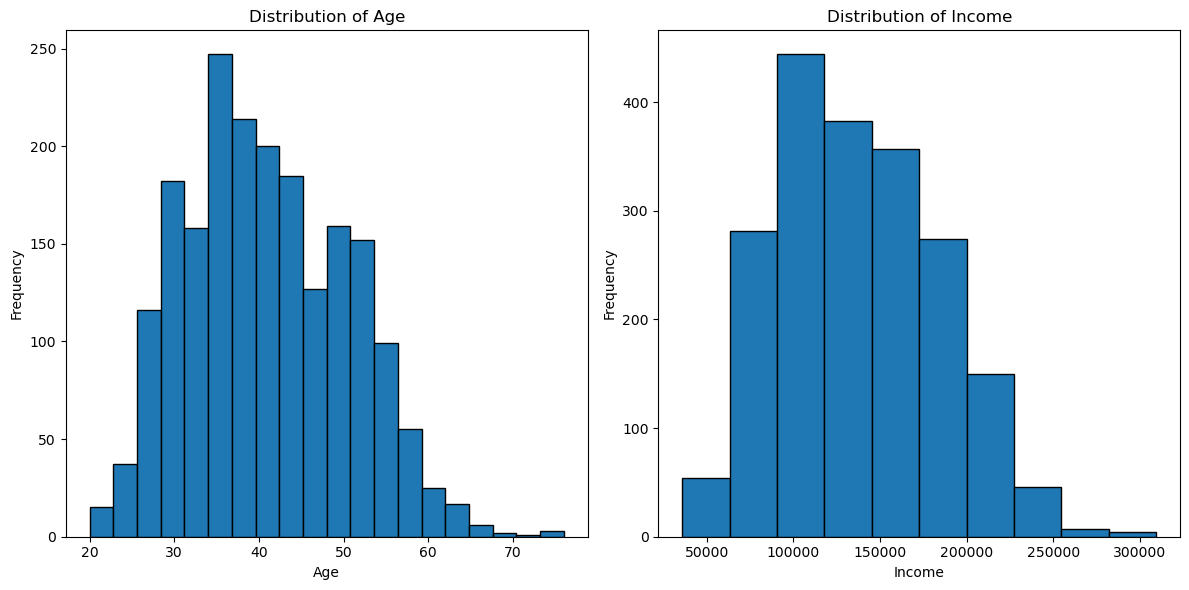

In [7]:
# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for Age
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Plot histogram for Income
plt.subplot(1, 2, 2)
plt.hist(df['Income'], bins=10, edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

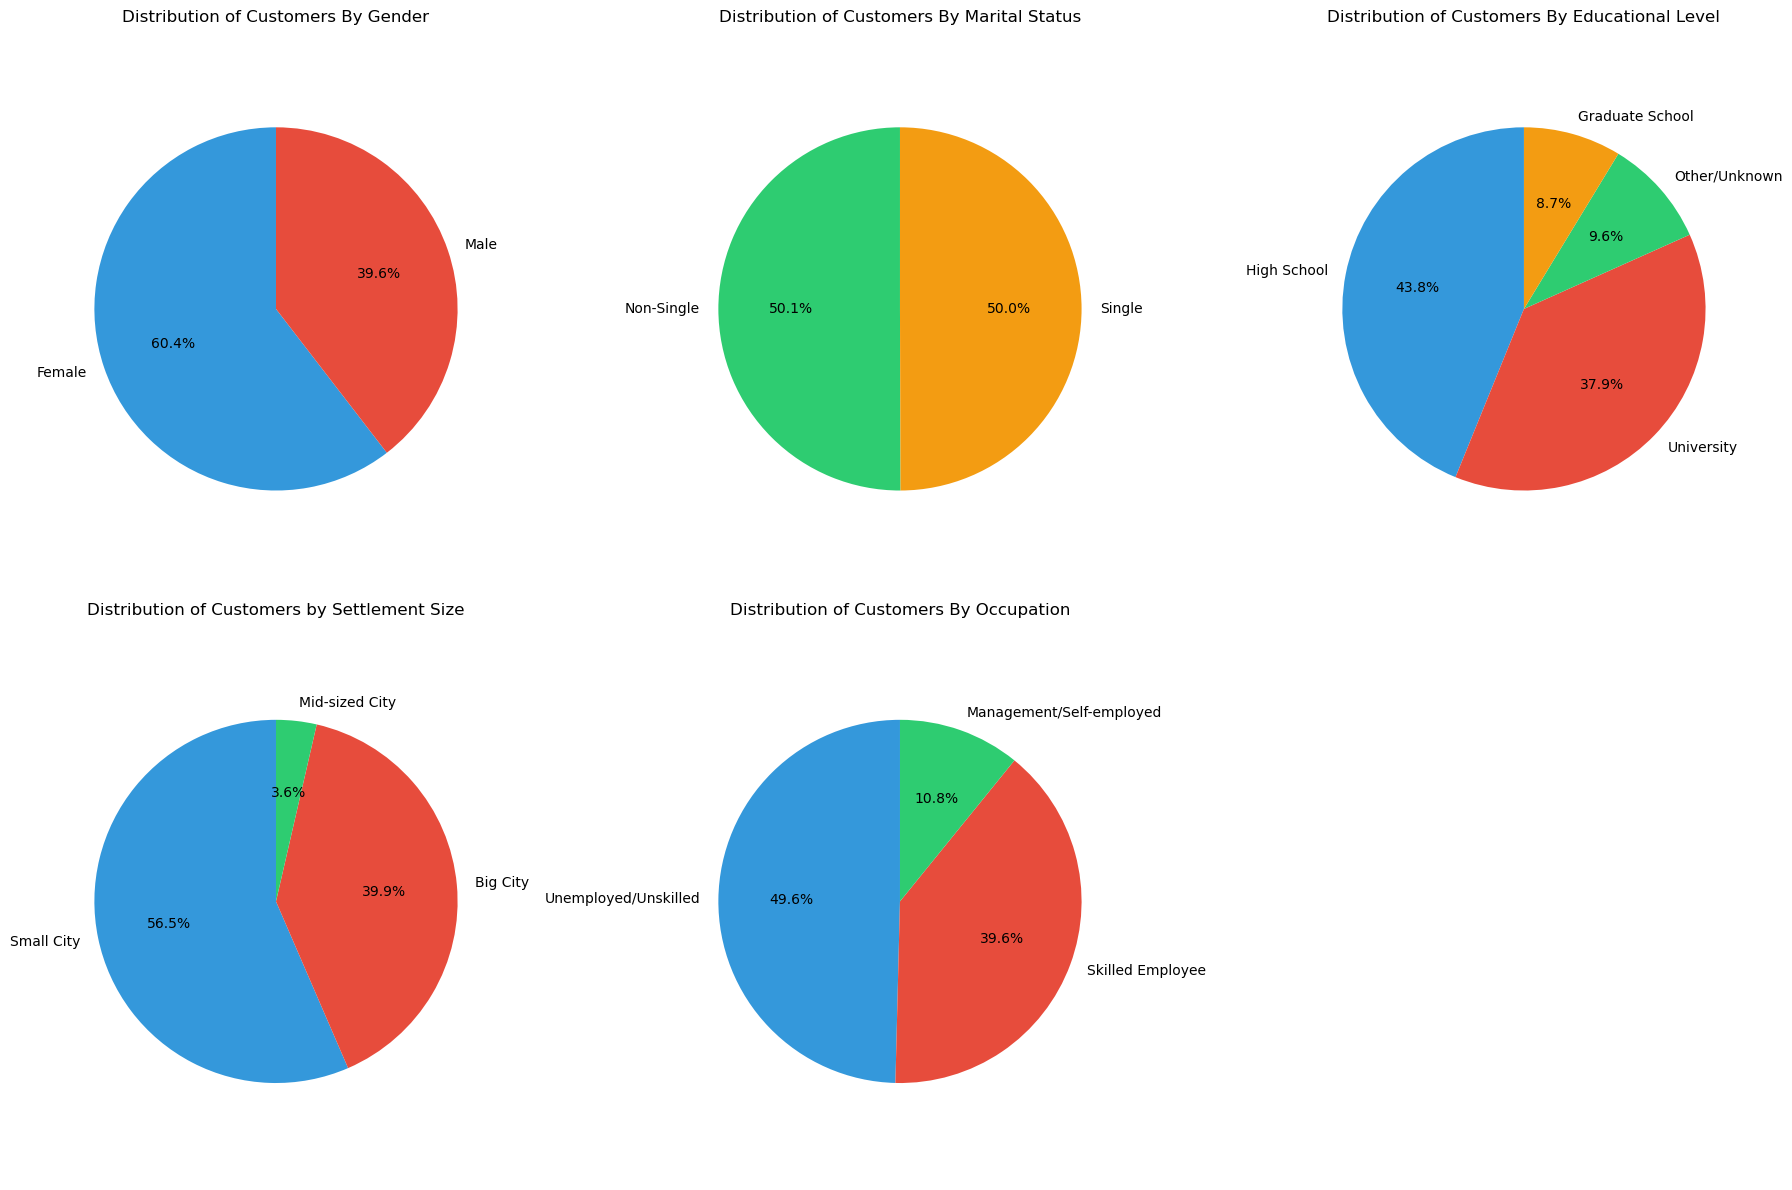

In [8]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Gender Distribution
gender_counts = df['Gender'].map({0: 'Male', 1: 'Female'}).value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#3498db', '#e74c3c'])
axes[0, 0].set_title('Distribution of Customers By Gender')
axes[0, 0].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Plot 2: Marital Status Distribution
marital_status_counts = df['Marital Status'].map({0: 'Single', 1: 'Non-Single'}).value_counts()
axes[0, 1].pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#f39c12'])
axes[0, 1].set_title('Distribution of Customers By Marital Status')
axes[0, 1].axis('equal')

# Plot 3: Education Level Distribution
education_counts = df['Education'].map({0: 'Other/Unknown', 1: 'High School', 2: 'University', 3: 'Graduate School'}).value_counts()
axes[0, 2].pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, colors=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
axes[0, 2].set_title('Distribution of Customers By Educational Level')
axes[0, 2].axis('equal')

# Plot 4: Settlement Size Distribution
settlement_counts = df['Settlement Size'].map({0: 'Small City', 1: 'Mid-sized City', 2: 'Big City'}).value_counts()
axes[1, 0].pie(settlement_counts, labels=settlement_counts.index, autopct='%1.1f%%', startangle=90, colors=['#3498db', '#e74c3c', '#2ecc71'])
axes[1, 0].set_title('Distribution of Customers by Settlement Size')
axes[1, 0].axis('equal')

# Plot 5: Occupation Distribution
occupation_counts = df['Occupation'].map({0: 'Unemployed/Unskilled', 1: 'Skilled Employee', 2: 'Management/Self-employed'}).value_counts()
axes[1, 1].pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=90, colors=['#3498db', '#e74c3c', '#2ecc71'])
axes[1, 1].set_title('Distribution of Customers By Occupation')
axes[1, 1].axis('equal')

# Remove the last empty plot (axes[1, 2])
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()
plt.show()


## 2. Customer Segmentation

### Standardise the two numeric variables using StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler
# np.set_printoptions(precision=3, suppress = True) # pretty printing

# Select the numeric variables to standardize
X = df[['Age', 'Income']]
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


In [10]:
# Add scaled variables to the original DataFrame
df['age_scaled'] = X_scaled[:, 0]  # Add scaled Age
df['income_scaled'] = X_scaled[:, 1]  # Add scaled Income


In [11]:
df

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,age_scaled,income_scaled
0,1,1,39,2,130568,1,2,-0.192892,-0.150483
1,0,0,29,1,80315,0,0,-1.250703,-1.238852
2,1,0,35,0,107067,0,0,-0.616016,-0.659462
3,0,1,56,2,214000,1,0,1.605387,1.656471
4,1,1,45,2,158138,1,2,0.441795,0.446623
...,...,...,...,...,...,...,...,...,...
1995,0,0,33,1,99931,0,0,-0.827579,-0.814013
1996,1,1,42,2,143369,1,2,0.124451,0.126759
1997,1,1,42,2,144512,1,2,0.124451,0.151514
1998,1,0,30,1,87071,0,0,-1.144922,-1.092532


### **Choose the optimal number of customer segments/clusters using the Elbow Method**

In [12]:
# Drop the 'Age' and 'Income' columns from the DataFrame
df_drop = df.drop(['Age', 'Income'], axis=1)

X = df_drop.copy()

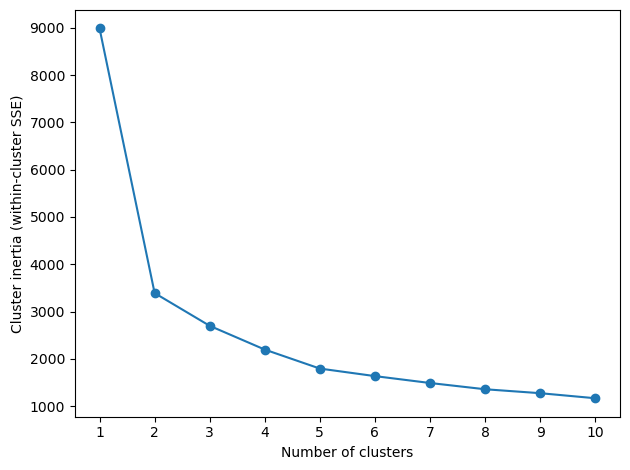

In [13]:
from sklearn.cluster import KMeans

# Determine number of clusters using Elbow Method
inertias = []  # Empty list to store inertia values


for i in range(1, 11):  # Run from 1 to max number of clusters
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1, 11))
plt.tight_layout()
plt.show()

### **Choose the optimal number of customer segments/clusters using three appropriately chosen Silhouette Plots**

In [14]:
import numpy as np
from matplotlib import cm

from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=2,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
# print(y_km)

cluster_labels = np.unique(y_km)
# print(cluster_labels)

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
# print('silhouette_vals\n', silhouette_vals)

silhouette_avg: 0.54


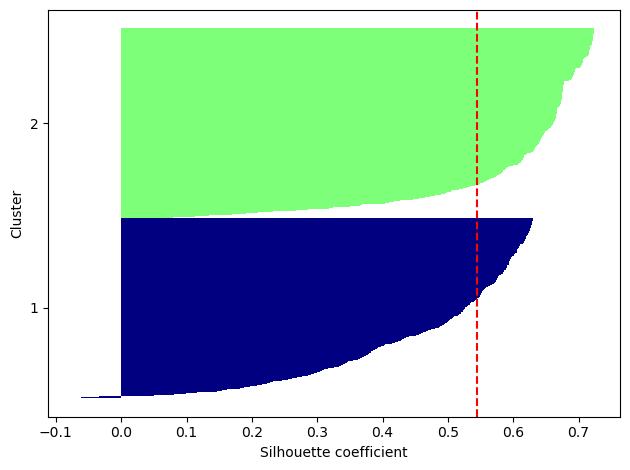

In [15]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

silhouette_avg: 0.43


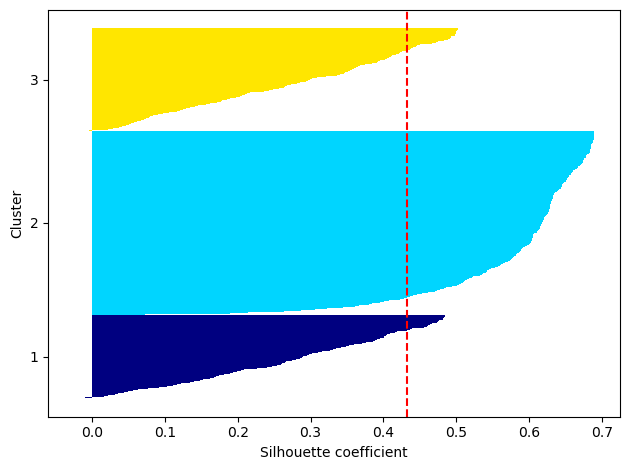

In [16]:
km = KMeans(n_clusters=3,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
# print(y_km)

cluster_labels = np.unique(y_km)
# print(cluster_labels)

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
# print('silhouette_vals\n', silhouette_vals)
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

silhouette_avg: 0.45


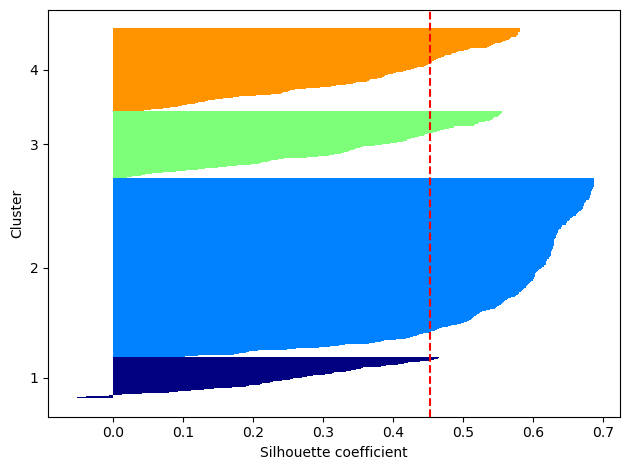

In [17]:
km = KMeans(n_clusters=4,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
# print(y_km)

cluster_labels = np.unique(y_km)
# print(cluster_labels)

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
# print('silhouette_vals\n', silhouette_vals)
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

### Estimate the clusters using both the K-means++ Clustering techniques based on optimal number

In [18]:
optimal_clusters = 2

km_plus = KMeans(n_clusters=optimal_clusters, 
            init='k-means++',  # use starndard k-means rather than k-means++ (see below)
            n_init=10,      # run 10 times with different random centroids to choose the final model with the lowest SSE
            max_iter=300,   # max number of iterations for each run
            random_state=0)

y_km_plus = km_plus.fit_predict(X)


print(y_km_plus)
print(f'\nClusters:\n {km_plus.cluster_centers_}')

df_drop['KMeans++'] = km_plus.labels_
df_drop['KMeans++'].value_counts()

[0 1 1 ... 0 1 0]

Clusters:
 [[ 0.85641026  0.99282051  2.10358974  1.21538462  1.63692308  0.77758205
   0.7781023 ]
 [ 0.36487805  0.03219512  0.84097561  0.03902439  0.0702439  -0.73965122
  -0.74014609]]


KMeans++
1    1024
0     976
Name: count, dtype: int64

### Estimate the clusters using both the Agglomerative Clustering techniques based on optimal number

In [19]:
#Agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=optimal_clusters, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)


print('Cluster labels: %s' % labels)

df_drop['Agglomerative'] = ac.labels_
df_drop['Agglomerative'].value_counts()

Cluster labels: [0 1 1 ... 0 1 0]


/Users/vandinh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Agglomerative
0    1163
1     837
Name: count, dtype: int64

### Table for KMeans clustering technique

In [20]:
# Drop the 'Agglomerative' column for KMeans++ analysis
df_kmeans = df_drop.drop(columns='Agglomerative')

# Count the number of customers in each cluster
kmeans_counts = df_kmeans['KMeans++'].value_counts().reset_index()
kmeans_counts.columns = ['Cluster', 'Number of Customers']

# Calculate the cluster centers (mean of features for each cluster)
kmeans_centers = df_kmeans.groupby('KMeans++').mean().reset_index()

# Combine both results into a single DataFrame using concat
kmeans_results = pd.concat([kmeans_centers, kmeans_counts.set_index('Cluster')], axis=1)

# Set the column names for the combined DataFrame
kmeans_results.columns = list(kmeans_centers.columns) + ['Number of Customers']

# Reset the index to make 'KMeans++' a column instead of an index
kmeans_results.reset_index(drop=True, inplace=True)

# Display the combined results
print("\nCombined Cluster Centers and Customer Counts (KMeans++):")
kmeans_results


Combined Cluster Centers and Customer Counts (KMeans++):


,KMeans++,Gender,Marital Status,Education,Occupation,Settlement Size,age_scaled,income_scaled,Number of Customers
0,0,0.855533,0.991803,2.102459,1.214139,1.635246,0.777997,0.778479,976
1,1,0.365234,0.032227,0.840820,0.039062,0.070312,-0.741528,-0.741987,1024


### Table for Agglomerative clustering technique¶

In [21]:
# Drop the 'KMeans++' column for Agglomerative analysis
df_agglomerative = df_drop.drop(columns='KMeans++')

# Count the number of customers in each cluster
agglomerative_counts = df_agglomerative['Agglomerative'].value_counts().reset_index()
agglomerative_counts.columns = ['Cluster', 'Number of Customers']

# Calculate the cluster centers (mean of features for each cluster)
agglomerative_centers = df_agglomerative.groupby('Agglomerative').mean().reset_index()

# Combine both results into a single DataFrame using concat
agglomerative_results = pd.concat([agglomerative_centers, agglomerative_counts.set_index('Cluster')], axis=1)

# Set the column names for the combined DataFrame
agglomerative_results.columns = list(agglomerative_centers.columns) + ['Number of Customers']

# Reset the index to make 'Agglomerative' a column instead of an index
agglomerative_results.reset_index(drop=True, inplace=True)

# Display the combined results
print("\nCombined Cluster Centers and Customer Counts (Agglomerative):")
agglomerative_results


Combined Cluster Centers and Customer Counts (Agglomerative):


,Agglomerative,Gender,Marital Status,Education,Occupation,Settlement Size,age_scaled,income_scaled,Number of Customers
0,0,0.774721,0.856406,1.925193,1.043852,1.384351,0.661907,0.662055,1163
1,1,0.367981,0.005974,0.805257,0.013142,0.069295,-0.919710,-0.919916,837


In [22]:
# Calculate mean of age and income column respectively in the original dataframe
age_mean = df['Age'].mean()
income_mean = df['Income'].mean()
print ("Mean of age: ", age_mean)
print ("Mean of income: ", income_mean)

Mean of age:  40.8235
Mean of income:  137516.1965


In [23]:
# Calculate standard deviation of age and income column respectively in the original dataframe
age_std = df['Age'].std()
income_std = df['Income'].std()
print ("Standard deviation of age: ", age_std)
print ("Standard deviation of income: ", income_std)

Standard deviation of age:  9.455847623409465
Standard deviation of income:  46184.29658753648


### Table with real age and income values with KMeans++ clustering technique

In [24]:
# Drop the 'Agglomerative' column for KMeans++ analysis
df_kmeans = df_drop.drop(columns='Agglomerative')

# Count the number of customers in each cluster
kmeans_counts = df_kmeans['KMeans++'].value_counts().reset_index()
kmeans_counts.columns = ['Cluster', 'Number of Customers']

# Calculate the cluster centers (mean of features for each cluster)
kmeans_centers = df_kmeans.groupby('KMeans++').mean().reset_index()

# Convert the scaled 'age_scaled' and 'income_scaled' back to real values for the cluster centers
kmeans_centers['Real Age'] = (kmeans_centers['age_scaled'] * age_std) + age_mean
kmeans_centers['Real Income'] = (kmeans_centers['income_scaled'] * income_std) + income_mean

# Drop the 'age_scaled' and 'income_scaled' columns from the kmeans_centers DataFrame
kmeans_centers = kmeans_centers.drop(columns=['age_scaled', 'income_scaled'])

# Combine both results into a single DataFrame using concat
kmeans_results = pd.concat([kmeans_centers, kmeans_counts.set_index('Cluster')], axis=1)

# Set the column names for the combined DataFrame
kmeans_results.columns = list(kmeans_centers.columns) + ['Number of Customers']

# Reset the index to make 'KMeans++' a column instead of an index
kmeans_results.reset_index(drop=True, inplace=True)

# Increment the cluster numbers by 1
kmeans_results['KMeans++'] = kmeans_results['KMeans++'] + 1

# Display the combined results
print("\nCombined Cluster Centers and Customer Counts (KMeans++) with Real Age and Income:")
kmeans_results



Combined Cluster Centers and Customer Counts (KMeans++) with Real Age and Income:


,KMeans++,Gender,Marital Status,Education,Occupation,Settlement Size,Real Age,Real Income,Number of Customers
0,1,0.855533,0.991803,2.102459,1.214139,1.635246,48.180118,173469.679044,976
1,2,0.365234,0.032227,0.840820,0.039062,0.070312,33.811723,103248.033451,1024


In [25]:

# Define mapping dictionaries for categorical variables
gender_mapping = {0: 'Male', 1: 'Female'}
marital_status_mapping = {0: 'Single', 1: 'Non-Single'}
education_mapping = {0: 'Other/Unknown', 1: 'High School', 2: 'University', 3: 'Graduate School'}
occupation_mapping = {0: 'Unemployed/Unskilled', 1: 'Skilled Employee/Official', 2: 'Management/Self-employed/Highly qualified employee /Officer'}
settlement_size_mapping = {0: 'Small City', 1: 'Mid-sized City', 2: 'Big City'}

# Map the rounded values to descriptive labels
kmeans_results['Gender'] = kmeans_results['Gender'].round().map(gender_mapping)
kmeans_results['Marital Status'] = kmeans_results['Marital Status'].round().map(marital_status_mapping)
kmeans_results['Education'] = kmeans_results['Education'].round().map(education_mapping)
kmeans_results['Occupation'] = kmeans_results['Occupation'].round().map(occupation_mapping)
kmeans_results['Settlement Size'] = kmeans_results['Settlement Size'].round().map(settlement_size_mapping)

# Display the transformed DataFrame
kmeans_results


,KMeans++,Gender,Marital Status,Education,Occupation,Settlement Size,Real Age,Real Income,Number of Customers
0,1,Female,Non-Single,University,Skilled Employee/Official,Big City,48.180118,173469.679044,976
1,2,Male,Single,High School,Unemployed/Unskilled,Small City,33.811723,103248.033451,1024


### Table with real age and income values with Agglomerative clustering technique¶

In [26]:
# Drop the 'KMeans++' column for Agglomerative analysis
df_agglomerative = df_drop.drop(columns='KMeans++')

# Count the number of customers in each cluster
agglomerative_counts = df_agglomerative['Agglomerative'].value_counts().reset_index()
agglomerative_counts.columns = ['Cluster', 'Number of Customers']

# Calculate the cluster centers (mean of features for each cluster)
agglomerative_centers = df_agglomerative.groupby('Agglomerative').mean().reset_index()

# Convert the scaled 'age_scaled' and 'income_scaled' back to real values for the cluster centers
agglomerative_centers['Real Age'] = (agglomerative_centers['age_scaled'] * age_std) + age_mean
agglomerative_centers['Real Income'] = (agglomerative_centers['income_scaled'] * income_std) + income_mean

# Drop the 'age_scaled' and 'income_scaled' columns from the agglomerative_centers DataFrame
agglomerative_centers = agglomerative_centers.drop(columns=['age_scaled', 'income_scaled'])

# Combine both results into a single DataFrame using concat
agglomerative_results = pd.concat([agglomerative_centers, agglomerative_counts.set_index('Cluster')], axis=1)

# Set the column names for the combined DataFrame
agglomerative_results.columns = list(agglomerative_centers.columns) + ['Number of Customers']

# Reset the index to make 'Agglomerative' a column instead of an index
agglomerative_results.reset_index(drop=True, inplace=True)

# Increment the cluster numbers by 1
agglomerative_results['Agglomerative'] = agglomerative_results['Agglomerative'] + 1

# Display the combined results
print("\nCombined Cluster Centers and Customer Counts (Agglomerative) with Real Age and Income:")
agglomerative_results



Combined Cluster Centers and Customer Counts (Agglomerative) with Real Age and Income:


,Agglomerative,Gender,Marital Status,Education,Occupation,Settlement Size,Real Age,Real Income,Number of Customers
0,1,0.774721,0.856406,1.925193,1.043852,1.384351,47.082390,168092.726774,1163
1,2,0.367981,0.005974,0.805257,0.013142,0.069295,32.126858,95030.527792,837


In [27]:
# Define mapping dictionaries for categorical variables
gender_mapping = {0: 'Male', 1: 'Female'}
marital_status_mapping = {0: 'Single', 1: 'Non-Single'}
education_mapping = {0: 'Other/Unknown', 1: 'High School', 2: 'University', 3: 'Graduate School'}
occupation_mapping = {0: 'Unemployed/Unskilled', 1: 'Skilled Employee/Official', 2: 'Management/Self-employed/Highly qualified employee /Officer'}
settlement_size_mapping = {0: 'Small City', 1: 'Mid-sized City', 2: 'Big City'}

# Map the rounded values to descriptive labels
agglomerative_results['Gender'] = agglomerative_results['Gender'].round().map(gender_mapping)
agglomerative_results['Marital Status'] = agglomerative_results['Marital Status'].round().map(marital_status_mapping)
agglomerative_results['Education'] = agglomerative_results['Education'].round().map(education_mapping)
agglomerative_results['Occupation'] = agglomerative_results['Occupation'].round().map(occupation_mapping)
agglomerative_results['Settlement Size'] = agglomerative_results['Settlement Size'].round().map(settlement_size_mapping)

# Display the transformed DataFrame
agglomerative_results

,Agglomerative,Gender,Marital Status,Education,Occupation,Settlement Size,Real Age,Real Income,Number of Customers
0,1,Female,Non-Single,University,Skilled Employee/Official,Mid-sized City,47.082390,168092.726774,1163
1,2,Male,Single,High School,Unemployed/Unskilled,Small City,32.126858,95030.527792,837
